In [1]:
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Read in the crypto data from the csv file

crypto_df = pd.read_csv(Path('crypto_data.csv'))


In [3]:
# Display the data frame
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
# Use only currencies that are trading, drop 'IsTrading' column
crypto_df2 = crypto_df[crypto_df['IsTrading'] == True]
crypto_df2 = crypto_df2.drop('IsTrading', 1)
crypto_df2

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
#Drop rows with nulls
crypto_df2 = crypto_df2.dropna()

In [6]:
# Display Cleansed data frame
crypto_df2

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
# Use only currencies that have been mined
crypto_df3 = crypto_df2[crypto_df2['TotalCoinsMined'] > 0]
crypto_df3

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
#drop columns with coin names
crypto_df3 = crypto_df3.drop('Unnamed: 0', 1)
crypto_df3 = crypto_df3.drop('CoinName', 1)
crypto_df3

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [9]:
# One hot encode categorical data and convert to numeric 
crypto_dummies = pd.get_dummies(crypto_df3)
crypto_dummies

,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Use standard scaler to scale the data
scaler = StandardScaler().fit(crypto_dummies)
crypto_scaled = scaler.transform(crypto_dummies)
crypto_scaled

array([[-0.11710817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [11]:
# Applying PCA to reduce dimensions with target of 90% explained variance

# Initialize PCA model
pca = PCA(n_components=.90)

# Get two principal components for the iris data.
crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca

array([[-2.67092248e-01, -1.16293969e-01, -2.75732806e-15, ...,
         1.25152058e+00,  6.82882208e-01, -1.50947062e+00],
       [-2.49924699e-01, -1.17272732e-01, -3.25016718e-15, ...,
        -6.73010177e-01, -1.97316071e+00,  1.70225075e+00],
       [ 3.14746498e-01, -2.86187718e-03,  2.44713680e-16, ...,
         1.13837114e+00,  1.67653502e+00, -2.71559881e+00],
       ...,
       [-6.67192566e-02, -3.11211774e-01,  8.30680353e-15, ...,
        -1.78166772e+00,  2.21936994e+00,  1.40860170e+00],
       [-2.90507995e-01, -2.45950491e-01,  7.75326907e-15, ...,
        -8.10997761e-16,  9.21133259e-16, -1.49183539e-15],
       [-1.99343294e-01, -6.23600551e-02, -8.15094422e-16, ...,
        -4.72551374e-13,  4.78561268e-13, -1.48710144e-12]])

In [12]:
# Display number of features before and after PCA
print('Number of features of scaled data: ',len(crypto_scaled[0]))
print('Number of features after PCA to retain 90% explained variance: ',len(crypto_pca[0]))

Number of features of scaled data:  377
Number of features after PCA to retain 90% explained variance:  274


## Note that 274 features (still a large number) had to be retained in order to explain
## 90% of variance.

In [13]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=200)

In [14]:
# Reduce dimensions
crypto_tsne = crypto_pca
tsne_features = tsne.fit_transform(crypto_tsne)

In [15]:
# The dataset has 2 columns
tsne_features.shape

(532, 2)

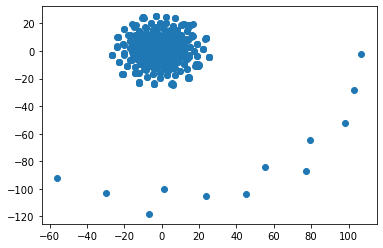

In [16]:
# Visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

# Results of T-SNE:

### After performing the T-SNE on the PCA output there doesn't appear to be any useful clustering. 
### The vast majority of them form a dense ball but there appear to be 12 outliers. 
### I say outliers, because the remaining twelve appear roughly evenly spaced with no additional clusters
### being apparent

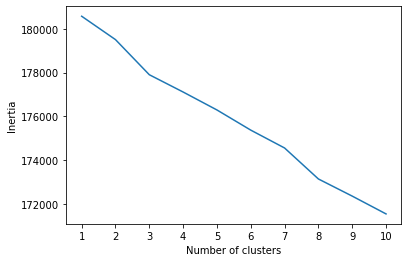

In [17]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=5)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Results of K-Means Analysis:

### After performing k-means analysis for 1 through 10 clusters on the crypto data, 
### there does not appear to be an obvious "elbow." That is to say, the inertia continues
### to decrease at a fairly steady rate with no apparent "point of dimishing return" as 
### the number of clusters is increased. 

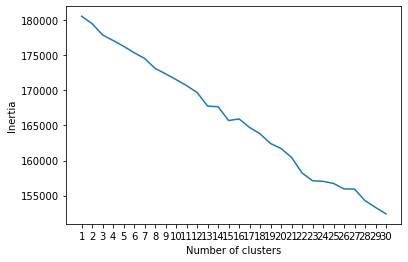

In [18]:
inertia = []
# Same as k = list(range(1, 31))
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=5)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,31))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Taking K-means even further

### I decided to try k-means analysis for 1 through 30 clusters to see if the pattern continued. 
### There was no appreaciable change to the shape of the curve (and still no elbow).
### The only conclusion I can draw from this is that there is no usefull clustering of the crypto
### currencies. In other words, there are not enough commonalities in their features to justify
### any grouping. 